# Data Analysis of BPI Challenge 2017

by Giray Coksun (giray.coskun@tum.de)

## Libraries and Data Loading

Data is in relative path *./data/BPI_Challenge_2017.xes*.

In [1]:
import pm4py
from pathlib import Path
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt

In [2]:
XES_FILE_NAME = "BPI_Challenge_2017.xes"
XES_FILE_PATH = Path("data").joinpath(XES_FILE_NAME)

# JSON_FILE_NAME = "data.json"
# JSON_FILE_PATH = Path("data").joinpath(JSON_FILE_NAME)

CSV_FILE_NAME = "BPI_Challenge_2017.csv"
CSV_FILE_PATH = Path("data").joinpath(CSV_FILE_NAME)

In [ ]:
log = pm4py.read_xes(XES_FILE_PATH.__str__())

/Users/giraycoskun/Code/Courses/business-process-praktikum/.venv/lib/python3.13/site-packages/pm4py/utils.py:986: UserWarning: In the current version, the import/export operation uses `rustxes` by default for importing/exporting files faster. Please uninstall `rustxes` to revert the behavior.
  warnings.warn("In the current version, the import/export operation uses `rustxes` by default for importing/exporting files faster. Please uninstall `rustxes` to revert the behavior.")


In [4]:
df = pm4py.convert_to_dataframe(log)

# df.to_csv(CSV_FILE_PATH.__str__()) 
# df = pd.read_csv(filepath_or_buffer=CSV_FILE_PATH.__str__(), ) # Reading from CSV can cause problems with data types

## Basic Statistics of the Event Log

In [5]:
df.head()

,case:concept:name,time:timestamp,case:LoanGoal,OfferID,case:RequestedAmount,Accepted,CreditScore,NumberOfTerms,lifecycle:transition,EventOrigin,Selected,FirstWithdrawalAmount,concept:name,OfferedAmount,Action,org:resource,MonthlyCost,EventID,case:ApplicationType
0,Application_652823628,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,None,20000.0,None,NaN,NaN,complete,Application,None,NaN,A_Create Application,NaN,Created,User_1,NaN,Application_652823628,New credit
1,Application_652823628,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,None,20000.0,None,NaN,NaN,complete,Application,None,NaN,A_Submitted,NaN,statechange,User_1,NaN,ApplState_1582051990,New credit
2,Application_652823628,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,None,20000.0,None,NaN,NaN,schedule,Workflow,None,NaN,W_Handle leads,NaN,Created,User_1,NaN,Workitem_1298499574,New credit
3,Application_652823628,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,None,20000.0,None,NaN,NaN,withdraw,Workflow,None,NaN,W_Handle leads,NaN,Deleted,User_1,NaN,Workitem_1673366067,New credit
4,Application_652823628,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,None,20000.0,None,NaN,NaN,schedule,Workflow,None,NaN,W_Complete application,NaN,Created,User_1,NaN,Workitem_1493664571,New credit


In [6]:
df.describe()

,case:RequestedAmount,CreditScore,NumberOfTerms,FirstWithdrawalAmount,OfferedAmount,MonthlyCost
count,1.202267e+06,42995.000000,42995.000000,42995.000000,42995.000000,42995.000000
mean,1.675947e+04,318.645912,83.041982,8394.338979,18513.719940,281.403309
std,1.572320e+04,433.706216,36.386199,10852.443358,13718.507416,192.577735
min,0.000000e+00,0.000000,5.000000,0.000000,5000.000000,43.050000
25%,6.000000e+03,0.000000,56.000000,0.000000,8800.000000,152.820000
50%,1.400000e+04,0.000000,77.000000,5000.000000,15000.000000,244.520000
75%,2.300000e+04,848.000000,120.000000,12000.000000,25000.000000,350.000000
max,4.500000e+05,1145.000000,180.000000,75000.000000,75000.000000,6673.830000


In [7]:
df.columns.tolist()

['case:concept:name',
 'time:timestamp',
 'case:LoanGoal',
 'OfferID',
 'case:RequestedAmount',
 'Accepted',
 'CreditScore',
 'NumberOfTerms',
 'lifecycle:transition',
 'EventOrigin',
 'Selected',
 'FirstWithdrawalAmount',
 'concept:name',
 'OfferedAmount',
 'Action',
 'org:resource',
 'MonthlyCost',
 'EventID',
 'case:ApplicationType']

In [8]:
n_cases = df['case:concept:name'].nunique()
n_events = len(df)
n_event_labels = df['concept:name'].nunique()
n_event_categories = df['EventOrigin'].nunique()

In [9]:
variants = pm4py.get_variants(log)
n_variants = len(variants)

In [10]:
metrics_data = [
    {"Metric": "Total Events", "Value": n_events,},
    {"Metric": "Total Unique Cases (Traces)", "Value": n_cases,},
    {"Metric": "Number of Variants", "Value": n_variants},
    {"Metric": "Unique Event Labels", "Value": n_event_labels,},
    {"Metric": "Event Categories", "Value": n_event_categories,},
]
metrics_df = pd.DataFrame(metrics_data)
display(metrics_df)

,Metric,Value
0,Total Events,1202267
1,Total Unique Cases (Traces),31509
2,Number of Variants,15930
3,Unique Event Labels,26
4,Event Categories,3


In [39]:
# Case Length Statistics
case_lengths = df.groupby('case:concept:name').size() # Number of events per case statistics 
mean_case_length = case_lengths.mean()
std_case_length = case_lengths.std()
min_case_length = case_lengths.min()
max_case_length = case_lengths.max()
median_case_length = case_lengths.median()
pprint.pprint({
    "Mean Case Length": int(mean_case_length),
    "Std Case Length": int(std_case_length),
    "Min Case Length": int(min_case_length),
    "Max Case Length": int(max_case_length),
    "Median Case Length": int(median_case_length),
})
case_lengths.describe() 


{'Max Case Length': 180,
 'Mean Case Length': 38,
 'Median Case Length': 35,
 'Min Case Length': 10,
 'Std Case Length': 16}


count    31509.000000
mean        38.156305
std         16.715308
min         10.000000
25%         25.000000
50%         35.000000
75%         47.000000
max        180.000000
dtype: float64

In [44]:
# Case Duration Statistics

case_times = df.groupby('case:concept:name')['time:timestamp'].agg(['min', 'max'])
case_times['duration'] = case_times['max'] - case_times['min']

# Duration in different units
case_times['duration_seconds'] = case_times['duration'].dt.total_seconds()
case_times['duration_minutes'] = case_times['duration_seconds'] / 60
case_times['duration_hours'] = case_times['duration_minutes'] / 60
case_times['duration_days'] = case_times['duration_hours'] / 24

mean_duration_days = case_times['duration_days'].mean()
std_duration_days = case_times['duration_days'].std()
mean_duration_hours = case_times['duration_hours'].mean()
std_duration_hours = case_times['duration_hours'].std()
mean_duration_minutes = case_times['duration_minutes'].mean()
std_duration_minutes = case_times['duration_minutes'].std()
mean_duration_seconds = case_times['duration_seconds'].mean()
std_duration_seconds = case_times['duration_seconds'].std()

min_duration = case_times['duration'].min()
max_duration = case_times['duration'].max()
median_duration = case_times['duration'].median()

pprint.pprint({
    "Mean Case Duration (days)": float(round(mean_duration_days, 2)),
    "Std Case Duration (days)": float(round(std_duration_days, 2)),
    "Mean Case Duration (hours)": float(round(mean_duration_hours, 2)),
    "Std Case Duration (hours)": float(round(std_duration_hours, 2)),
    "Mean Case Duration (minutes)": float(round(mean_duration_minutes, 2)),
    "Std Case Duration (minutes)": float(round(std_duration_minutes, 2)),
    "Mean Case Duration (seconds)": float(round(mean_duration_seconds, 2)),
    "Std Case Duration (seconds)": float(round(std_duration_seconds, 2)),
})

pprint.pprint({
    "Min Case Duration": min_duration,
    "Max Case Duration": max_duration,
    "Median Case Duration": median_duration,
})

case_times.describe()

{'Mean Case Duration (days)': 21.9,
 'Mean Case Duration (hours)': 525.59,
 'Mean Case Duration (minutes)': 31535.43,
 'Mean Case Duration (seconds)': 1892125.92,
 'Std Case Duration (days)': 13.17,
 'Std Case Duration (hours)': 316.06,
 'Std Case Duration (minutes)': 18963.69,
 'Std Case Duration (seconds)': 1137821.69}
{'Max Case Duration': Timedelta('286 days 01:44:18.654000'),
 'Median Case Duration': Timedelta('19 days 02:06:20.668000'),
 'Min Case Duration': Timedelta('0 days 00:03:21.062000')}


,duration,duration_seconds,duration_minutes,duration_hours,duration_days
count,31509,3.150900e+04,31509.000000,31509.000000,31509.000000
mean,21 days 21:35:25.923069948,1.892126e+06,31535.432051,525.590534,21.899606
std,13 days 04:03:41.690875763,1.137822e+06,18963.694848,316.061581,13.169233
min,0 days 00:03:21.062000,2.010620e+02,3.351033,0.055851,0.002327
25%,11 days 07:47:31.679000,9.784517e+05,16307.527983,271.792133,11.324672
50%,19 days 02:06:20.668000,1.649181e+06,27486.344467,458.105741,19.087739
75%,31 days 11:53:50.946000,2.721231e+06,45353.849100,755.897485,31.495729
max,286 days 01:44:18.654000,2.471666e+07,411944.310900,6865.738515,286.072438


In [21]:
# Number of categorical event attributes
categorical_attrs = {}
categorical_attrs_labels = {}
for col in df.columns:
    if df[col].dtype == 'object' and not col.startswith('time:'):
        if col not in ['case:concept:name', 'OfferID', 'EventID']:
            categorical_attrs[col] = {
                "Number of Values": df[col].unique().size,
                "Most Frequent Value": df[col].mode()[0],
                "Frequency of Most Frequent Value": int(df[col].value_counts().iloc[0]),
            }
            if col != 'org:resource':
                categorical_attrs_labels[col] = df[col].unique().tolist()
pprint.pprint(categorical_attrs)

{'Accepted': {'Frequency of Most Frequent Value': 30136,
              'Most Frequent Value': True,
              'Number of Values': 3},
 'Action': {'Frequency of Most Frequent Value': 358940,
            'Most Frequent Value': 'statechange',
            'Number of Values': 5},
 'EventOrigin': {'Frequency of Most Frequent Value': 768823,
                 'Most Frequent Value': 'Workflow',
                 'Number of Values': 3},
 'Selected': {'Frequency of Most Frequent Value': 21768,
              'Most Frequent Value': True,
              'Number of Values': 3},
 'case:ApplicationType': {'Frequency of Most Frequent Value': 1083767,
                          'Most Frequent Value': 'New credit',
                          'Number of Values': 2},
 'case:LoanGoal': {'Frequency of Most Frequent Value': 339798,
                   'Most Frequent Value': 'Car',
                   'Number of Values': 14},
 'concept:name': {'Frequency of Most Frequent Value': 209496,
                  'Most Fr

In [ ]:
pprint.pprint(categorical_attrs_labels)

{'Accepted': [None, True, False],
 'Action': ['Created', 'statechange', 'Deleted', 'Obtained', 'Released'],
 'EventOrigin': ['Application', 'Workflow', 'Offer'],
 'Selected': [None, True, False],
 'case:ApplicationType': ['New credit', 'Limit raise'],
 'case:LoanGoal': ['Existing loan takeover',
                   'Home improvement',
                   'Car',
                   'Other, see explanation',
                   'Remaining debt home',
                   'Not speficied',
                   'Unknown',
                   'Caravan / Camper',
                   'Tax payments',
                   'Extra spending limit',
                   'Motorcycle',
                   'Boat',
                   'Business goal',
                   'Debt restructuring'],
 'concept:name': ['A_Create Application',
                  'A_Submitted',
                  'W_Handle leads',
                  'W_Complete application',
                  'A_Concept',
                  'A_Accepted',
            

In [ ]:

case_lengths = df.groupby('case:concept:name').size()
mean_case_length = case_lengths.mean()
std_case_length = case_lengths.std()
min_case_length = case_lengths.min()
max_case_length = case_lengths.max()
median_case_length = case_lengths.median()

In [ ]:
# Additional metrics
#  Events per day
time_span_days = (df['time:timestamp'].max() - df['time:timestamp'].min()).days
events_per_day = n_events / time_span_days if time_span_days > 0 else 0

# b) Unique resources (if available)
if 'org:resource' in df.columns:
    n_resources = df['org:resource'].nunique()
    events_per_resource = n_events / n_resources
else:
    n_resources = 0
    events_per_resource = 0

# c) Variant coverage (% of cases covered by top variant)
if n_variants > 0:
    variant_freq = sorted(variants.items(), key=lambda x: len(x[1]), reverse=True)
    top_variant_coverage = (len(variant_freq[0][1]) / n_cases) * 100
else:
    top_variant_coverage = 0

# d) Process complexity (ratio of variants to cases)
process_complexity = n_variants / n_cases if n_cases > 0 else 0


In [55]:
variants = pm4py.get_variants(log)

# 2. Count how many unique variants exist
print(f"Total number of traces in log: {len(log)}")
print(f"Total number of unique variants: {len(variants)}")

Total number of traces in log: 1202267
Total number of unique variants: 15930


In [56]:
# Sort variants by the number of cases (most frequent first)
# The 'variants' object is a dict: {variant_tuple: list_of_cases}

sorted_variants = sorted(variants.items(), key=lambda item: item[1], reverse=True)

print(f"{'Rank':<5} | {'Count':<8} | {'Coverage %':<12} | {'Variant (First 3 activities)'}")
print("-" * 60)

cumulative_count = 0
total_traces = len(log)

# Display top 10 variants
for i, (variant, traces) in enumerate(sorted_variants[:10]):
    count = traces
    cumulative_count += traces
    coverage = (cumulative_count / total_traces) * 100
    
    # Truncate the variant string for cleaner printing
    variant_preview = str(variant[:3]) + "..." 
    
    print(f"{i+1:<5} | {count:<8} | {coverage:<11.2f}% | {variant_preview}")

Rank  | Count    | Coverage %   | Variant (First 3 activities)
------------------------------------------------------------
1     | 1056     | 0.09       % | ('A_Create Application', 'A_Submitted', 'W_Handle leads')...
2     | 1021     | 0.17       % | ('A_Create Application', 'W_Complete application', 'W_Complete application')...
3     | 734      | 0.23       % | ('A_Create Application', 'A_Submitted', 'W_Handle leads')...
4     | 451      | 0.27       % | ('A_Create Application', 'A_Submitted', 'W_Handle leads')...
5     | 332      | 0.30       % | ('A_Create Application', 'A_Submitted', 'W_Handle leads')...
6     | 298      | 0.32       % | ('A_Create Application', 'A_Submitted', 'W_Handle leads')...
7     | 278      | 0.35       % | ('A_Create Application', 'W_Complete application', 'W_Complete application')...
8     | 244      | 0.37       % | ('A_Create Application', 'A_Submitted', 'W_Handle leads')...
9     | 212      | 0.38       % | ('A_Create Application', 'A_Submitted', 'W_H

### Visualization of Basic Statistics

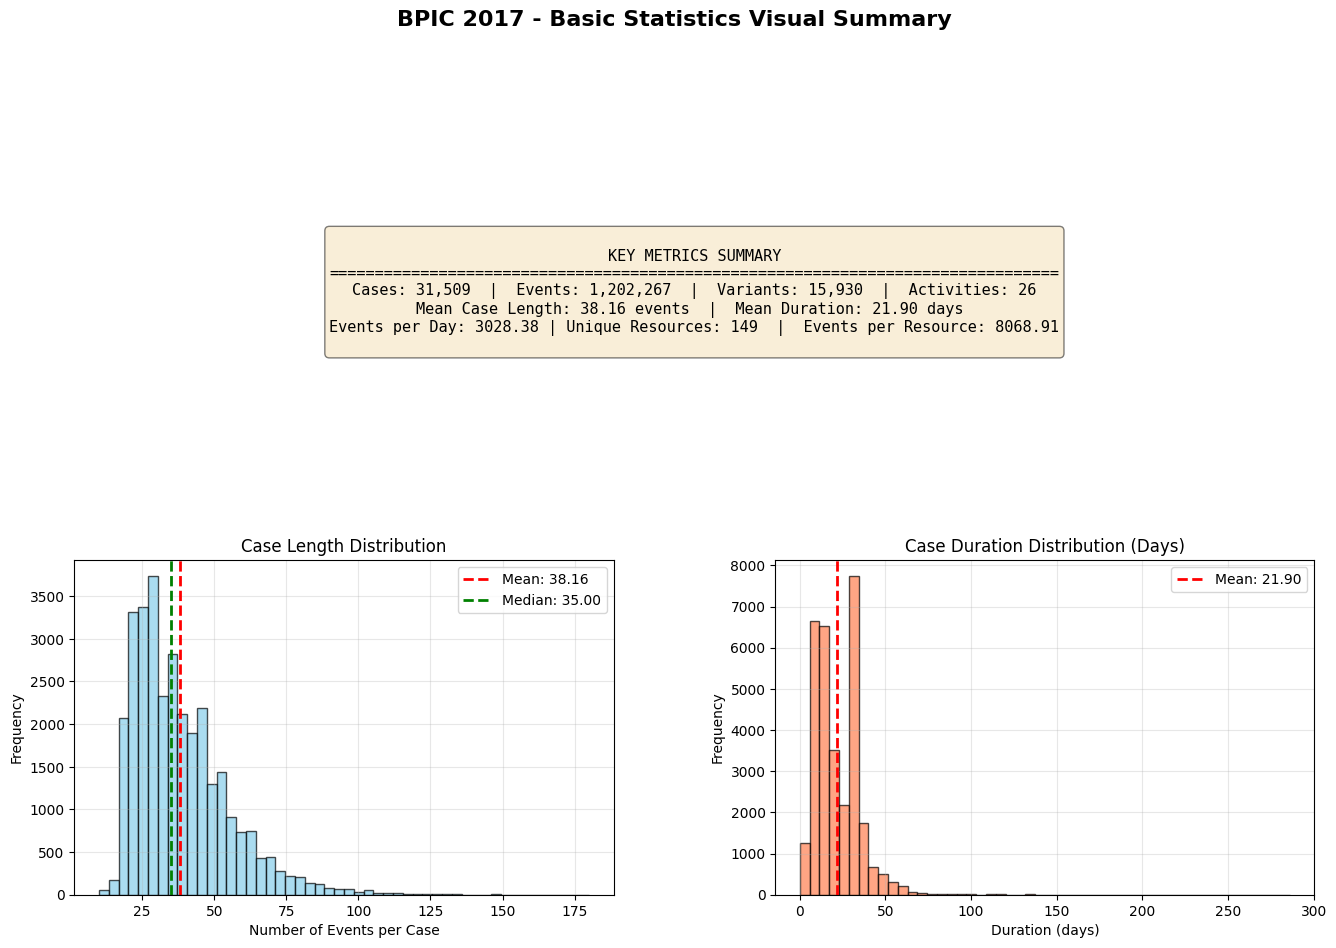

In [48]:
# Create a visual summary dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# 1. Key metrics as text boxes
ax1 = fig.add_subplot(gs[0, :])
ax1.axis('off')
metrics_text = f"""
KEY METRICS SUMMARY
{'='*80}
Cases: {n_cases:,}  |  Events: {n_events:,}  |  Variants: {n_variants:,}  |  Activities: {n_event_labels}
Mean Case Length: {mean_case_length:.2f} events  |  Mean Duration: {mean_duration_days:.2f} days 
Events per Day: {events_per_day:.2f} | Unique Resources: {n_resources}  |  Events per Resource: {events_per_resource:.2f}
"""
ax1.text(0.5, 0.5, metrics_text, ha='center', va='center', 
         fontsize=11, family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# 2. Case length distribution
ax2 = fig.add_subplot(gs[1, 0])
ax2.hist(case_lengths, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
ax2.axvline(mean_case_length, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_case_length:.2f}')
ax2.axvline(median_case_length, color='green', linestyle='--', linewidth=2, label=f'Median: {median_case_length:.2f}')
ax2.set_xlabel('Number of Events per Case')
ax2.set_ylabel('Frequency')
ax2.set_title('Case Length Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Case duration distribution (days)
ax3 = fig.add_subplot(gs[1, 1])
ax3.hist(case_times['duration_days'], bins=50, edgecolor='black', alpha=0.7, color='coral')
ax3.axvline(mean_duration_days, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration_days:.2f}')
ax3.set_xlabel('Duration (days)')
ax3.set_ylabel('Frequency')
ax3.set_title('Case Duration Distribution (Days)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Case duration distribution (hours) - zoomed for better view
# ax4 = fig.add_subplot(gs[1, 2])
# ax4.hist(case_times['duration_hours'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
# ax4.axvline(mean_duration_hours, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_duration_hours:.2f}')
# ax4.set_xlabel('Duration (hours)')
# ax4.set_ylabel('Frequency')
# ax4.set_title('Case Duration Distribution (Hours)')
# ax4.legend()
# ax4.grid(True, alpha=0.3)


plt.suptitle('BPIC 2017 - Basic Statistics Visual Summary', fontsize=16, fontweight='bold', y=0.995)
plt.savefig('basic_statistics_summary.png', dpi=300, bbox_inches='tight')
plt.show()


In [60]:
# Extract the first event of each case (application submission time)
case_starts = df.groupby('case:concept:name')['time:timestamp'].min().reset_index()
case_starts.columns = ['case_id', 'start_time']
case_starts = case_starts.sort_values('start_time')

print(f"Total number of applications: {len(case_starts):,}")
print(f"First application: {case_starts['start_time'].min()}")
print(f"Last application: {case_starts['start_time'].max()}")
print(f"Time span: {(case_starts['start_time'].max() - case_starts['start_time'].min()).days} days")

# Add time-based features
case_starts['date'] = case_starts['start_time'].dt.date
case_starts['year'] = case_starts['start_time'].dt.year
case_starts['month'] = case_starts['start_time'].dt.month
case_starts['week'] = case_starts['start_time'].dt.isocalendar().week
case_starts['day_of_week'] = case_starts['start_time'].dt.day_name()
case_starts['hour'] = case_starts['start_time'].dt.hour
case_starts['year_month'] = case_starts['start_time'].dt.to_period('M')

daily_rate = case_starts.groupby('date').size().reset_index(name='applications')
weekly_rate = case_starts.groupby(case_starts['start_time'].dt.to_period('W')).size().reset_index(name='applications')
monthly_rate = case_starts.groupby('year_month').size().reset_index(name='applications')
hourly_rate = case_starts.groupby('hour').size().reset_index(name='applications')
day_of_week_rate = case_starts.groupby('day_of_week').size().reset_index(name='applications')

# Statistics
print("\nINCOMING RATE STATISTICS")
print("="*80)
print(f"Daily average: {daily_rate['applications'].mean():.2f} applications/day")
print(f"Daily std dev: {daily_rate['applications'].std():.2f} applications/day")
print(f"Max daily rate: {daily_rate['applications'].max()} applications (on {daily_rate.loc[daily_rate['applications'].idxmax(), 'date']})")
print(f"Min daily rate: {daily_rate['applications'].min()} applications (on {daily_rate.loc[daily_rate['applications'].idxmin(), 'date']})")

Total number of applications: 31,509
First application: 2016-01-01 09:51:15.304000+00:00
Last application: 2016-12-31 21:37:53.216000+00:00
Time span: 365 days

INCOMING RATE STATISTICS
Daily average: 86.09 applications/day
Daily std dev: 32.18 applications/day
Max daily rate: 178 applications (on 2016-07-04)
Min daily rate: 20 applications (on 2016-12-25)


/var/folders/gf/8h7fh46n0ps41zkyppzp52100000gn/T/ipykernel_44617/3875317873.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  case_starts['year_month'] = case_starts['start_time'].dt.to_period('M')
/var/folders/gf/8h7fh46n0ps41zkyppzp52100000gn/T/ipykernel_44617/3875317873.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  weekly_rate = case_starts.groupby(case_starts['start_time'].dt.to_period('W')).size().reset_index(name='applications')


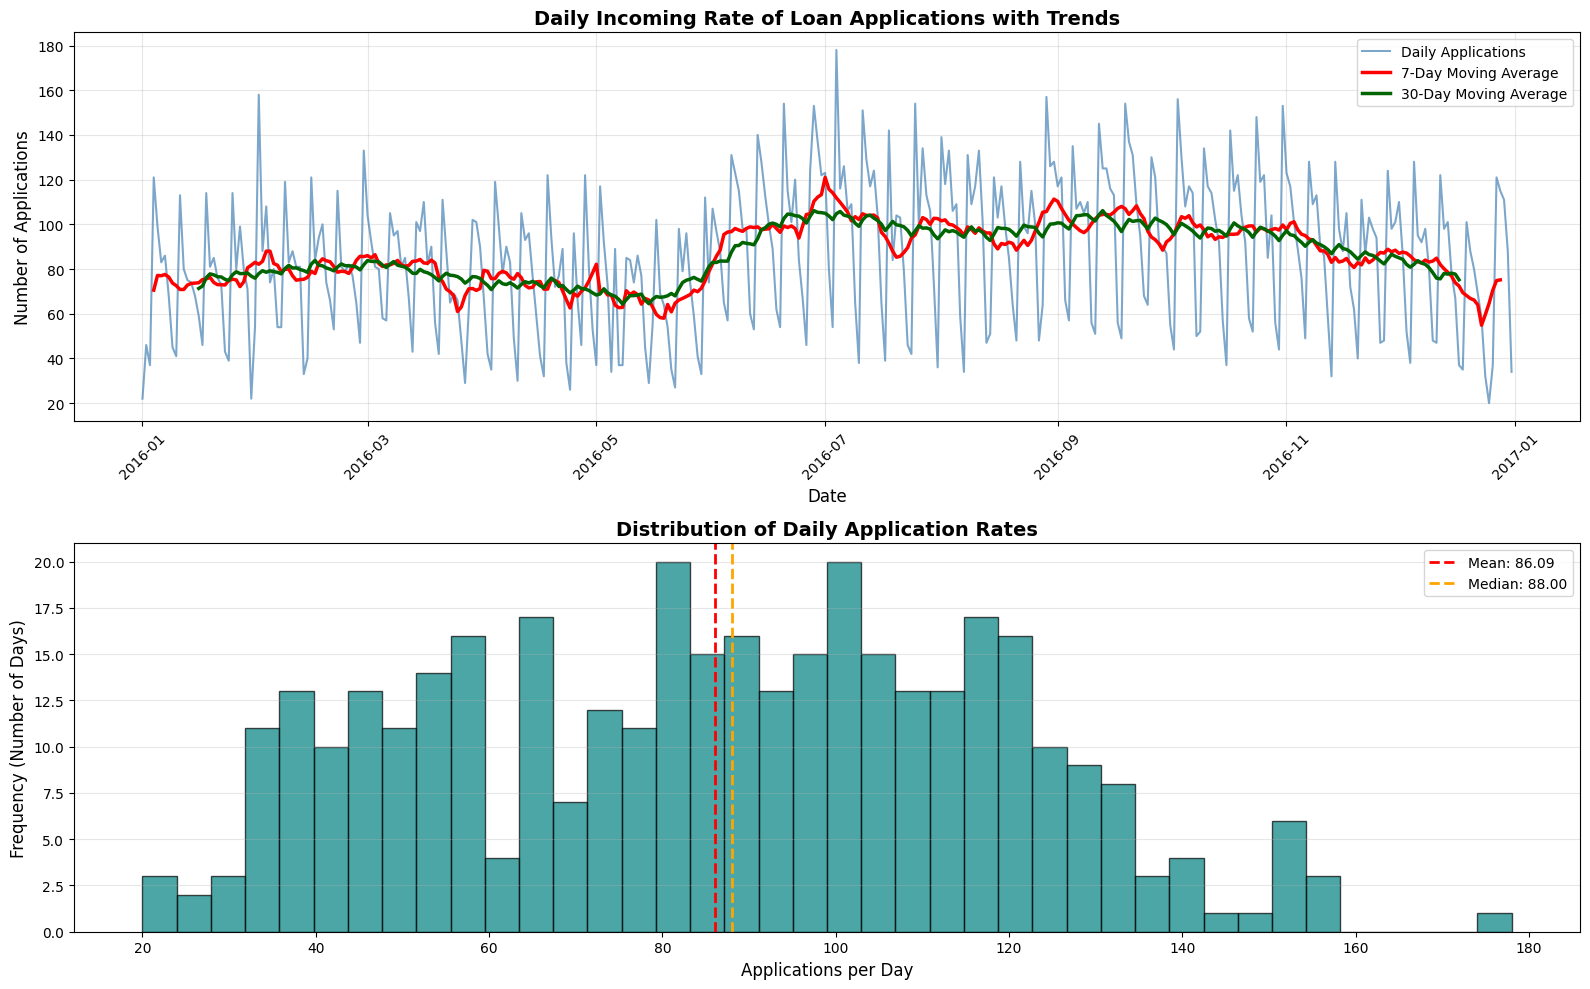

✓ Daily incoming rate visualization saved


In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# 1. Daily time series with trend
ax1 = axes[0]
daily_rate['date_datetime'] = pd.to_datetime(daily_rate['date'])
ax1.plot(daily_rate['date_datetime'], daily_rate['applications'], 
         linewidth=1.5, alpha=0.7, color='steelblue', label='Daily Applications')

# Add moving average (7-day)
daily_rate['ma_7'] = daily_rate['applications'].rolling(window=7, center=True).mean()
ax1.plot(daily_rate['date_datetime'], daily_rate['ma_7'], 
         linewidth=2.5, color='red', label='7-Day Moving Average')

# Add moving average (30-day)
daily_rate['ma_30'] = daily_rate['applications'].rolling(window=30, center=True).mean()
ax1.plot(daily_rate['date_datetime'], daily_rate['ma_30'], 
         linewidth=2.5, color='darkgreen', label='30-Day Moving Average')

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Number of Applications', fontsize=12)
ax1.set_title('Daily Incoming Rate of Loan Applications with Trends', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Daily rate histogram with statistics
ax2 = axes[1]
ax2.hist(daily_rate['applications'], bins=40, edgecolor='black', alpha=0.7, color='teal')
ax2.axvline(daily_rate['applications'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {daily_rate["applications"].mean():.2f}')
ax2.axvline(daily_rate['applications'].median(), color='orange', linestyle='--', 
            linewidth=2, label=f'Median: {daily_rate["applications"].median():.2f}')
ax2.set_xlabel('Applications per Day', fontsize=12)
ax2.set_ylabel('Frequency (Number of Days)', fontsize=12)
ax2.set_title('Distribution of Daily Application Rates', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('daily_incoming_rate.png', dpi=300, bbox_inches='tight')
plt.show()

Total number of applications: 31,509
First application: 2016-01-06 08:50:04.878000+00:00
Last application: 2017-02-01 14:11:03.499000+00:00
Time span: 392 days

FFinish RATE STATISTICS 
Daily average: 81.00 applications/day
Daily std dev: 66.02 applications/day
Max daily rate: 527 applications (on 2016-10-24)
Min daily rate: 1 applications (on 2016-01-16)


/var/folders/gf/8h7fh46n0ps41zkyppzp52100000gn/T/ipykernel_44617/4193527805.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  case_finishes['year_month'] = case_finishes['finish_time'].dt.to_period('M')
/var/folders/gf/8h7fh46n0ps41zkyppzp52100000gn/T/ipykernel_44617/4193527805.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  weekly_rate = case_finishes.groupby(case_finishes['finish_time'].dt.to_period('W')).size().reset_index(name='applications')


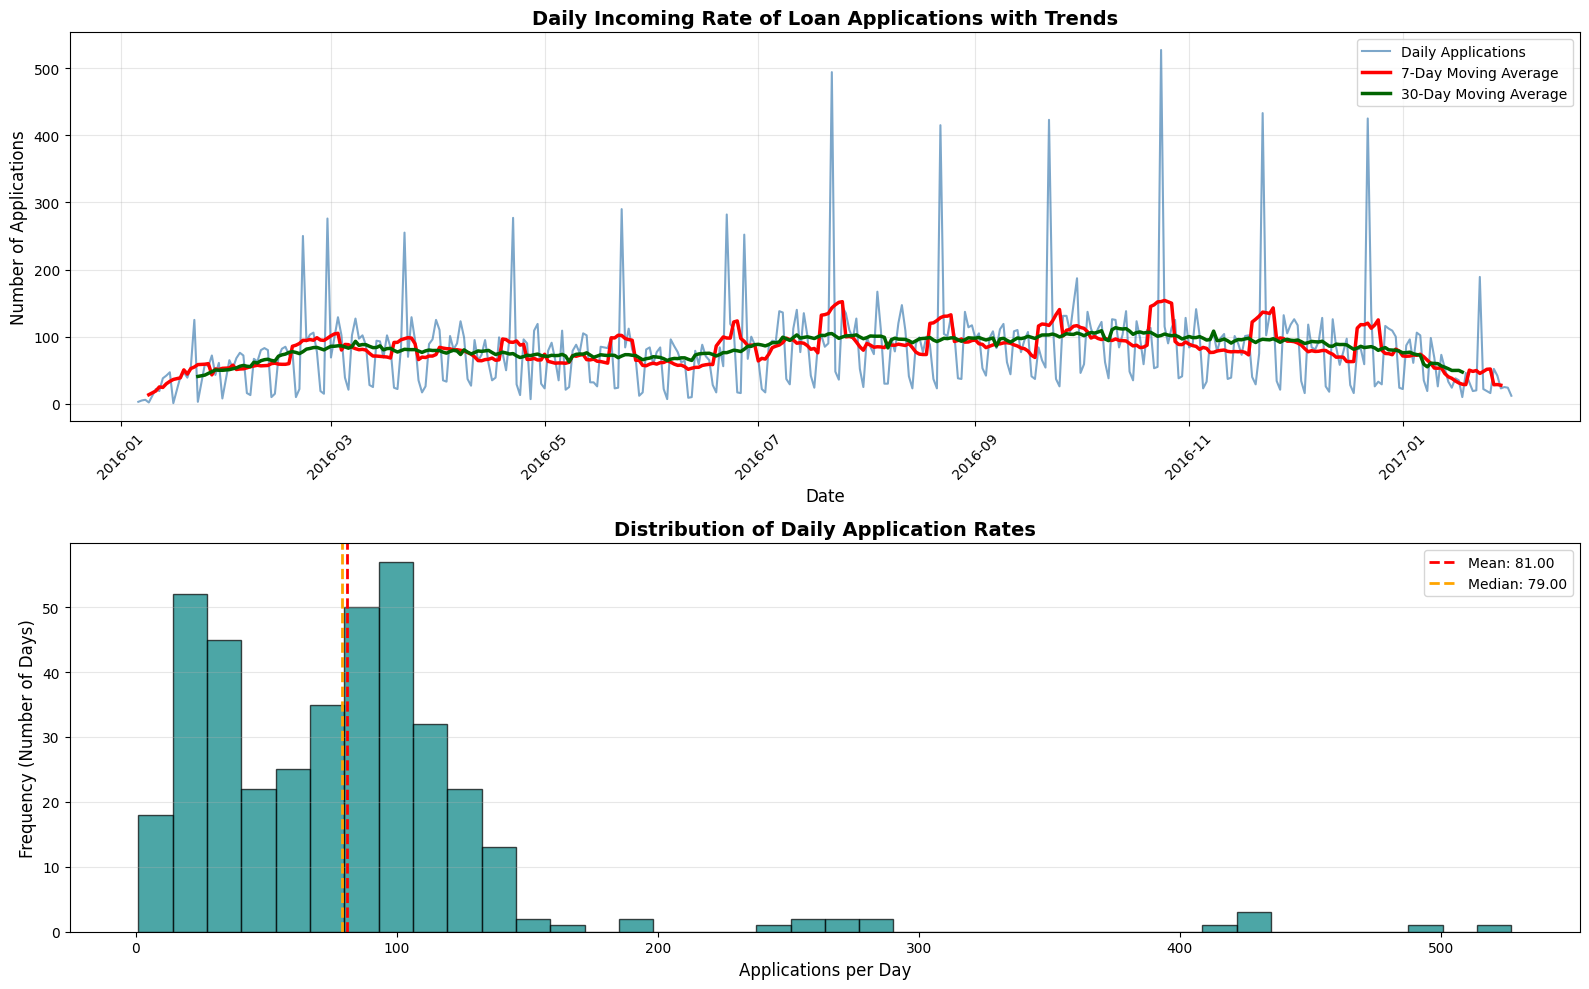

In [62]:
# Extract the first event of each case (application submission time)
case_finishes = df.groupby('case:concept:name')['time:timestamp'].max().reset_index()
case_finishes.columns = ['case_id', 'finish_time']
case_finishes = case_finishes.sort_values('finish_time')

print(f"Total number of applications: {len(case_finishes):,}")
print(f"First application: {case_finishes['finish_time'].min()}")
print(f"Last application: {case_finishes['finish_time'].max()}")
print(f"Time span: {(case_finishes['finish_time'].max() - case_finishes['finish_time'].min()).days} days")

# Add time-based features
case_finishes['date'] = case_finishes['finish_time'].dt.date
case_finishes['year'] = case_finishes['finish_time'].dt.year
case_finishes['month'] = case_finishes['finish_time'].dt.month
case_finishes['week'] = case_finishes['finish_time'].dt.isocalendar().week
case_finishes['day_of_week'] = case_finishes['finish_time'].dt.day_name()
case_finishes['hour'] = case_finishes['finish_time'].dt.hour
case_finishes['year_month'] = case_finishes['finish_time'].dt.to_period('M')

daily_rate = case_finishes.groupby('date').size().reset_index(name='applications')
weekly_rate = case_finishes.groupby(case_finishes['finish_time'].dt.to_period('W')).size().reset_index(name='applications')
monthly_rate = case_finishes.groupby('year_month').size().reset_index(name='applications')
hourly_rate = case_finishes.groupby('hour').size().reset_index(name='applications')
day_of_week_rate = case_finishes.groupby('day_of_week').size().reset_index(name='applications')
# Statistics
print("\nFFinish RATE STATISTICS ")
print("="*80)
print(f"Daily average: {daily_rate['applications'].mean():.2f} applications/day")
print(f"Daily std dev: {daily_rate['applications'].std():.2f} applications/day")
print(f"Max daily rate: {daily_rate['applications'].max()} applications (on {daily_rate.loc[daily_rate['applications'].idxmax(), 'date']})")
print(f"Min daily rate: {daily_rate['applications'].min()} applications (on {daily_rate.loc[daily_rate['applications'].idxmin(), 'date']})")

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# 1. Daily time series with trend
ax1 = axes[0]
daily_rate['date_datetime'] = pd.to_datetime(daily_rate['date'])
ax1.plot(daily_rate['date_datetime'], daily_rate['applications'], 
         linewidth=1.5, alpha=0.7, color='steelblue', label='Daily Applications')

# Add moving average (7-day)
daily_rate['ma_7'] = daily_rate['applications'].rolling(window=7, center=True).mean()
ax1.plot(daily_rate['date_datetime'], daily_rate['ma_7'], 
         linewidth=2.5, color='red', label='7-Day Moving Average')

# Add moving average (30-day)
daily_rate['ma_30'] = daily_rate['applications'].rolling(window=30, center=True).mean()
ax1.plot(daily_rate['date_datetime'], daily_rate['ma_30'], 
         linewidth=2.5, color='darkgreen', label='30-Day Moving Average')

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Number of Applications', fontsize=12)
ax1.set_title('Daily Incoming Rate of Loan Applications with Trends', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True, alpha=0.3)
ax1.tick_params(axis='x', rotation=45)

# 2. Daily rate histogram with statistics
ax2 = axes[1]
ax2.hist(daily_rate['applications'], bins=40, edgecolor='black', alpha=0.7, color='teal')
ax2.axvline(daily_rate['applications'].mean(), color='red', linestyle='--', 
            linewidth=2, label=f'Mean: {daily_rate["applications"].mean():.2f}')
ax2.axvline(daily_rate['applications'].median(), color='orange', linestyle='--', 
            linewidth=2, label=f'Median: {daily_rate["applications"].median():.2f}')
ax2.set_xlabel('Applications per Day', fontsize=12)
ax2.set_ylabel('Frequency (Number of Days)', fontsize=12)
ax2.set_title('Distribution of Daily Application Rates', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('daily_incoming_rate.png', dpi=300, bbox_inches='tight')
plt.show()

In [81]:
df.groupby('concept:name').size().sort_values(ascending=False)

concept:name
W_Validate application        209496
W_Call after offers           191092
W_Call incomplete files       168529
W_Complete application        148900
W_Handle leads                 47264
O_Create Offer                 42995
O_Created                      42995
O_Sent (mail and online)       39707
A_Validating                   38816
A_Create Application           31509
A_Concept                      31509
A_Accepted                     31509
A_Complete                     31362
O_Returned                     23305
A_Incomplete                   23055
O_Cancelled                    20898
A_Submitted                    20423
O_Accepted                     17228
A_Pending                      17228
A_Cancelled                    10431
O_Refused                       4695
A_Denied                        3753
W_Assess potential fraud        3282
O_Sent (online only)            2026
W_Shortened completion           238
W_Personal Loan collection        22
dtype: int64

In [5]:
trace_variants = pm4py.get_variants(log)


In [ ]:
trace_lengths = []
for variant, cases in trace_variants.items():
    trace_lengths.append(len(variant))
print("\nTrace Length Statistics:")
print(f"  Min: {min(trace_lengths)}")
print(f"  Max: {max(trace_lengths)}")
print(f"  Mean: {np.mean(trace_lengths):.2f}")
print(f"  Median: {np.median(trace_lengths):.2f}")
print("\nProcess Variants:")
print(f"  Total unique variants: {len(trace_variants)}")
print(f"  Most common variant occurs: {max(trace_variants.values())} times")


Trace Length Statistics:
  Min: 10
  Max: 180
  Mean: 48.41
  Median: 46.00

Process Variants:
  Total unique variants: 15930
  Most common variant occurs: 1056 times
